In [1]:
from pystac_client import Client
from odc.stac import load
import geopandas as gpd

In [2]:
grid = (gpd.read_file(
        "https://raw.githubusercontent.com/digitalearthpacific/dep-grid/master/grid_pacific.geojson"
    )
    .astype({"tile_id": str, "country_code": str})
    .set_index(["tile_id", "country_code"], drop=False))

client = Client.open("https://stac.staging.digitalearthpacific.org")

In [3]:
region_code = "63,20"

cell = grid.loc[[(region_code)]]
cell.explore()

In [4]:
items = list(client.search(
    collections=["dep_s2_geomad"],
    intersects=cell.buffer(-0.001).geometry[0]
).items())

/var/folders/p8/zk3xfwk969vdx8d5284hrgww0000gn/T/ipykernel_19115/646117380.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersects=cell.buffer(-0.001).geometry[0]
/opt/homebrew/lib/python3.11/site-packages/geopandas/geoseries.py:622: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = getattr(super(), mtd)(*args, **kwargs)


In [5]:
data = load(items, geometry=cell, resolution=100, chunks={"x": 2048, "y": 2048})
data

<xarray.Dataset>
Dimensions:      (y: 960, x: 960, time: 1)
Coordinates:
  * y            (y) float64 -1.984e+06 -1.984e+06 ... -2.08e+06 -2.08e+06
  * x            (x) float64 3.048e+06 3.048e+06 ... 3.144e+06 3.144e+06
    spatial_ref  int32 3832
  * time         (time) datetime64[ns] 2023-01-01
Data variables: (12/14)
    B02          (time, y, x) float32 dask.array<chunksize=(1, 960, 960), meta=np.ndarray>
    B03          (time, y, x) float32 dask.array<chunksize=(1, 960, 960), meta=np.ndarray>
    B04          (time, y, x) float32 dask.array<chunksize=(1, 960, 960), meta=np.ndarray>
    B05          (time, y, x) float32 dask.array<chunksize=(1, 960, 960), meta=np.ndarray>
    B06          (time, y, x) float32 dask.array<chunksize=(1, 960, 960), meta=np.ndarray>
    B07          (time, y, x) float32 dask.array<chunksize=(1, 960, 960), meta=np.ndarray>
    ...           ...
    B12          (time, y, x) float32 dask.array<chunksize=(1, 960, 960), meta=np.ndarray>
    B8A          (time, y, x) float32 dask.array<chunksize=(1, 960, 960), meta=np.ndarray>
    emad         (time, y, x) float32 dask.array<chunksize=(1, 960, 960), meta=np.ndarray>
    smad         (time, y, x) float32 dask.array<chunksize=(1, 960, 960), meta=np.ndarray>
    bcmad        (time, y, x) float32 dask.array<chunksize=(1, 960, 960), meta=np.ndarray>
    count        (time, y, x) float32 dask.array<chunksize=(1, 960, 960), meta=np.ndarray>

In [11]:
data.isel(time=0)["count"].odc.explore()

In [8]:
data.odc.to_rgba(bands=["B04", "B03", "B02"], vmin=0, vmax=3000).odc.explore()

/opt/homebrew/lib/python3.11/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


In [60]:
import odc.geo
import numpy as np

data_scaled = 10 * np.log(data_subset)
data_scaled["vv_vh_mean"] = data_scaled.vv_vh_mean * -2

rgba = data_scaled.odc.to_rgba(bands=["mean_vv", "mean_vh", "vv_vh_mean"], vmin=-50, vmax=0)

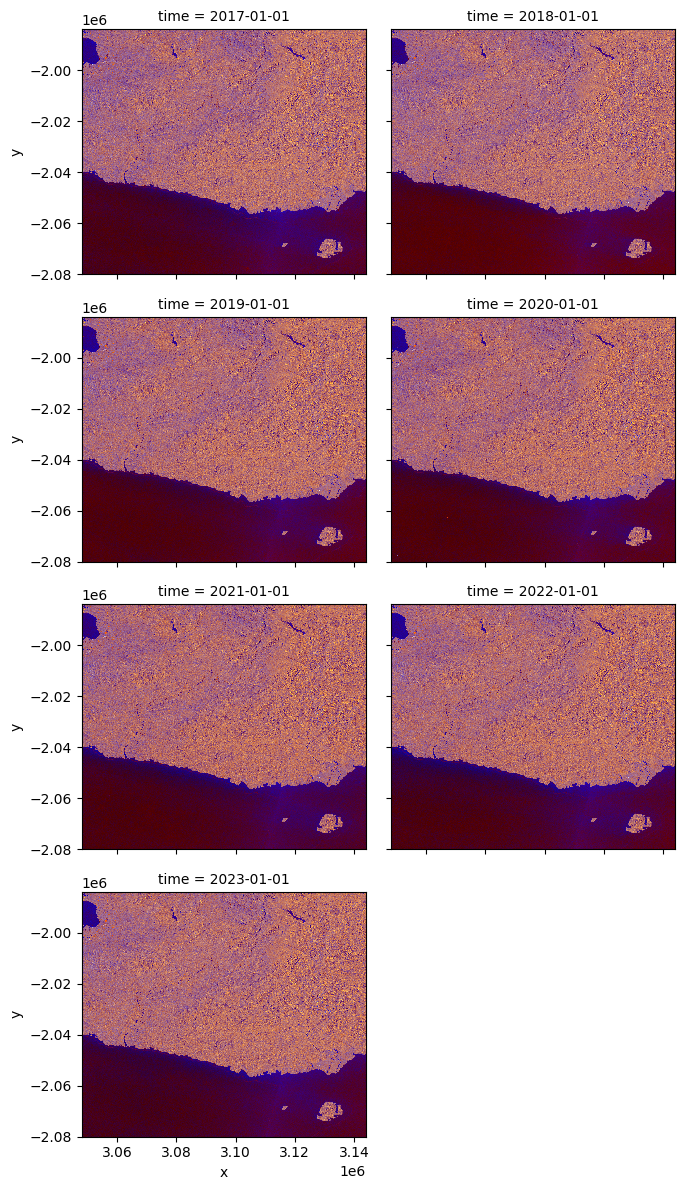

In [61]:
rgba.plot.imshow(col="time", col_wrap=2)